In [1]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import six

%matplotlib inline


import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
study = flotilla.embark('singlecell_pnm', flotilla_dir=flotilla_dir)

2017-01-12 17:17:56	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm/datapackage.json
2017-01-12 17:17:56	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-12 17:18:34 	Initializing Study
2017-01-12 17:18:34 	Initializing Predictor configuration manager for Study
2017-01-12 17:18:34	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-12 17:18:34	Added ExtraTreesClassifier to default predictors
2017-01-12 17:18:34	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-12 17:18:34	Added ExtraTreesRegressor to default predictors
2017-01-12 17:18:34	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-12 17:18:34	Added GradientBoostingClassifier to default predictors
2017-01-12 17:18:34	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-12 17:18:34	Added GradientBoostingRegressor to default predictors
2017-01-12 17:18:34 	Loading metadata
2017-01-12 17:18:34	Loading expression data
2017-0

In [2]:
sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

In [3]:
figure_folder = 'figures/021_outrigger_vs_rmdup_percentages'
! mkdir -p $figure_folder

In [4]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
original_folder = '{}/outrigger_v2_bam_unstranded/psi'.format(folder)
rmdup_folder = '{}/csvs_for_paper/outrigger_v2_rmdup_unstranded/psi'.format(folder)

In [5]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

In [6]:
len(case_order)

14

In [7]:
! ls -lha $folder/outrigger_summary_original_rmdup_combined_tidy.csv

-rw-r--r-- 1 obotvinnik yeo-group 6.9G Jan 12 16:24 /projects/ps-yeolab/obotvinnik/singlecell_pnms/outrigger_summary_original_rmdup_combined_tidy.csv


In [8]:
summary = pd.read_csv('{}/outrigger_summary_original_rmdup_combined_wide.csv'.format(folder))
print(summary.shape)

summary.head()

(12567319, 27)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (20,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sample_id,event_id,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,...,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_copy,note_copy,notes_abbrev_rmdup,dataset_rmdup
0,CVN_01,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
1,CVN_02,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
2,CVN_03,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
3,CVN_04,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup
4,CVN_05,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,...,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2: Zero observed reads,Case 2: Zero observed reads,Case 2,rmdup


In [9]:
summary.groupby('notes_abbrev_rmdup').size()

notes_abbrev_rmdup
Case 1       442948
Case 11a         25
Case 11b         11
Case 19a      21960
Case 19b        636
Case 2      6046981
Case 3       544090
Case 4       855718
Case 5       106747
Case 6       460537
Case 7       708422
Case 8        42960
Case 9a       23733
Case 9b        6538
dtype: int64

In [10]:
summary.groupby('notes_abbrev_original').size()

notes_abbrev_original
Case 1       480351
Case 10a      41958
Case 10b       1284
Case 11a       1327
Case 11b       1378
Case 2      8920535
Case 3       727246
Case 4       951333
Case 5       145599
Case 6       468539
Case 7       720021
Case 8        56288
Case 9a       42871
Case 9b        8589
dtype: int64

## Percent of events in each category

In [11]:
max_delta_psi = 0.2

In [12]:
col = 'comparison_categories'

summary[col] = 'Other'
summary.loc[summary['psi_rmdup'].isnull() & summary['psi_original'].isnull(), col] = 'rmdup NA, original NA'
summary.loc[(summary['psi_rmdup'] - summary['psi_original']).abs() <= max_delta_psi, col] = \
    'Within $|\Delta\Psi| \leq {}$'.format(max_delta_psi)
summary.loc[summary['psi_rmdup'].notnull() & summary['psi_original'].isnull(), col] = 'rmdup Psi, original NA'
summary.loc[summary['psi_rmdup'].isnull() & summary['psi_original'].notnull(), col] = 'rmdup NA, original Psi'
summary.loc[(summary['psi_rmdup'] == 0) & (summary['psi_original'] > max_delta_psi), col] = 'rmdup 0, original Psi'
summary.loc[(summary['psi_rmdup'] == 1) & (summary['psi_original'] < (1 - max_delta_psi)), col] = 'rmdup 1, original Psi'
category_sizes = summary.groupby(col).size()
category_sizes

comparison_categories
Other                                  334
Within $|\Delta\Psi| \leq 0.2$     1234946
rmdup 0, original Psi                   76
rmdup 1, original Psi                  231
rmdup NA, original NA             11214265
rmdup NA, original Psi               95417
rmdup Psi, original NA               22050
dtype: int64

In [13]:
category_percentages = 100 * category_sizes/category_sizes.sum()
category_percentages

comparison_categories
Other                              0.002658
Within $|\Delta\Psi| \leq 0.2$     9.826646
rmdup 0, original Psi              0.000605
rmdup 1, original Psi              0.001838
rmdup NA, original NA             89.233551
rmdup NA, original Psi             0.759247
rmdup Psi, original NA             0.175455
dtype: float64

In [14]:
category_sizes_not_both_na = category_sizes[(category_sizes.index != "rmdup NA, original NA")]
category_sizes_not_both_na

comparison_categories
Other                                 334
Within $|\Delta\Psi| \leq 0.2$    1234946
rmdup 0, original Psi                  76
rmdup 1, original Psi                 231
rmdup NA, original Psi              95417
rmdup Psi, original NA              22050
dtype: int64

In [15]:
category_sizes_not_both_na.sum()

1353054

In [16]:
original_not_na = [x for x in category_sizes_not_both_na.index if 'original NA' not in x]

category_sizes_percent_original = 100 * category_sizes_not_both_na[original_not_na]/summary['psi_original'].notnull().sum()
category_sizes_percent_original.name = 'original'
category_sizes_percent_original

comparison_categories
Other                              0.025094
Within $|\Delta\Psi| \leq 0.2$    92.783042
rmdup 0, original Psi              0.005710
rmdup 1, original Psi              0.017355
rmdup NA, original Psi             7.168799
Name: original, dtype: float64

In [17]:
rmdup_not_na = [x for x in category_sizes_not_both_na.index if 'rmdup NA' not in x]

category_sizes_percent_rmdup = 100 * category_sizes_not_both_na[rmdup_not_na]/summary['psi_rmdup'].notnull().sum()
category_sizes_percent_rmdup.name = 'rmdup'
category_sizes_percent_rmdup

comparison_categories
Other                              0.026558
Within $|\Delta\Psi| \leq 0.2$    98.195743
rmdup 0, original Psi              0.006043
rmdup 1, original Psi              0.018368
rmdup Psi, original NA             1.753288
Name: rmdup, dtype: float64

In [18]:
category_percentages_df = category_sizes_percent_original.to_frame().join(category_sizes_percent_rmdup, how='outer')
category_percentages_df

,original,rmdup
comparison_categories,,
Other,0.025094,0.026558
Within $|\Delta\Psi| \leq 0.2$,92.783042,98.195743
"rmdup 0, original Psi",0.005710,0.006043
"rmdup 1, original Psi",0.017355,0.018368
"rmdup NA, original Psi",7.168799,NaN
"rmdup Psi, original NA",NaN,1.753288


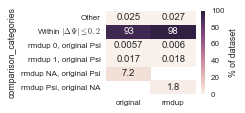

In [19]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.heatmap(category_percentages_df, annot=True, vmin=0, vmax=100, cbar_kws=dict(label='% of dataset'))
fig.savefig('{}/comparison_categories_percentages_heatmap.pdf'.format(figure_folder))

In [20]:
category_sizes_not_both_na_percentage = 100 * category_sizes_not_both_na/category_sizes_not_both_na.sum()
category_sizes_not_both_na_percentage

comparison_categories
Other                              0.024685
Within $|\Delta\Psi| \leq 0.2$    91.271006
rmdup 0, original Psi              0.005617
rmdup 1, original Psi              0.017072
rmdup NA, original Psi             7.051973
rmdup Psi, original NA             1.629647
dtype: float64

In [21]:
category_sizes_not_both_na_percentage_tidy = category_sizes_not_both_na_percentage.reset_index()
category_sizes_not_both_na_percentage_tidy = category_sizes_not_both_na_percentage_tidy.rename(columns={0: 'Percentage'})
category_sizes_not_both_na_percentage_tidy

,comparison_categories,Percentage
0,Other,0.024685
1,Within $|\Delta\Psi| \leq 0.2$,91.271006
2,"rmdup 0, original Psi",0.005617
3,"rmdup 1, original Psi",0.017072
4,"rmdup NA, original Psi",7.051973
5,"rmdup Psi, original NA",1.629647


In [22]:
figure_folder

'figures/021_outrigger_vs_rmdup_percentages'

In [23]:
import matplotlib as mpl

In [24]:
not_within = [x for x in category_sizes_not_both_na.index if 'Within' not in x]
not_within

['Other',
 'rmdup 0, original Psi',
 'rmdup 1, original Psi',
 'rmdup NA, original Psi',
 'rmdup Psi, original NA']

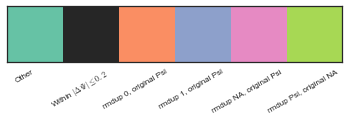

In [25]:
palette = dict(zip(not_within, map(mpl.colors.rgb2hex, sns.color_palette('Set2'))))
palette['Within $|\Delta\Psi| \leq 0.2$'] = '#262626'
palette_series = pd.Series(palette)
sns.palplot(palette_series)

ax = plt.gca()
ax.set(xticks=np.arange(len(palette_series))-0.2)
ax.set_xticklabels(palette_series.index, rotation=30)

(2.524684898015896, 0.2)
(93.771006183049607, 1.2)
(2.5056169229018206, 2.2)
(2.5170724893463232, 3.2)
(9.5519727963555034, 4.2)
(4.1296467103308512, 5.2)


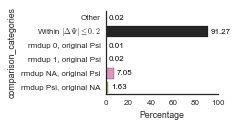

In [26]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.barplot(y='comparison_categories', x='Percentage', 
            data=category_sizes_not_both_na_percentage_tidy, palette=palette)
sns.despine()
ax.set(xlabel='Percentage')
xmin, xmax = ax.get_xlim()
x_value_range = xmax - xmin
xoffset = 0.025 * xmax

for i, (case, x) in enumerate(category_sizes_not_both_na_percentage.iteritems()):
#     x = category_sizes_not_both_na[case]
    coords = (x + xoffset, i+0.2)
    print(coords)
    ax.annotate("{:.2f}".format(x), coords, fontsize=8, 
                va='bottom', ha='left', color='black')

fig.savefig('{}/comparison_categories_percentages_barplots_fullsize.pdf'.format(figure_folder))


# ax.set(xlim=(0, 2))
# fig.savefig('{}/comparison_categories_percentages_barplots_zoomed.pdf'.format(figure_folder))

## Percentage of cases

In [27]:
cases_counts = summary.groupby(['notes_abbrev_original', 'notes_abbrev_rmdup']).size().unstack()
cases_counts = cases_counts.loc[case_order, case_order]
cases_counts

notes_abbrev_rmdup,Case 1,Case 2,Case 3,Case 4,Case 5,Case 6,Case 7,Case 8,Case 9a,Case 9b,Case 10a,Case 10b,Case 11a,Case 11b
notes_abbrev_original,,,,,,,,,,,,,,
Case 1,439367.0,5294.0,3569.0,4055.0,1395.0,353.0,280.0,19.0,139.0,15.0,NaN,NaN,5.0,4.0
Case 2,1103.0,5969976.0,2328.0,46.0,NaN,8.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case 3,1371.0,51976.0,465299.0,11997.0,209.0,5068.0,2811.0,51.0,47.0,207.0,NaN,NaN,NaN,NaN
Case 4,776.0,9410.0,45014.0,801935.0,1040.0,188.0,4495.0,42.0,27.0,34.0,NaN,NaN,2.0,1.0
Case 5,210.0,774.0,1157.0,14255.0,102611.0,2830.0,1464.0,129.0,2000.0,482.0,NaN,NaN,4.0,NaN
Case 6,47.0,4928.0,17423.0,914.0,17.0,434767.0,NaN,NaN,74.0,12.0,NaN,NaN,NaN,NaN
Case 7,30.0,3442.0,6024.0,20234.0,608.0,NaN,678362.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Case 8,NaN,252.0,273.0,556.0,278.0,90.0,2709.0,42089.0,2089.0,141.0,NaN,NaN,4.0,2.0
Case 9a,23.0,412.0,632.0,310.0,433.0,16023.0,5.0,236.0,19112.0,2254.0,NaN,NaN,1.0,NaN


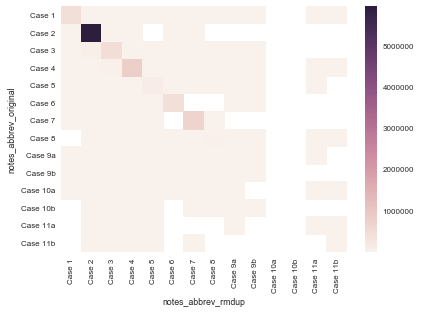

In [28]:
sns.heatmap(cases_counts)

In [29]:
cases_counts.max(axis=1)

notes_abbrev_original
Case 1       439367.0
Case 2      5969976.0
Case 3       465299.0
Case 4       801935.0
Case 5       102611.0
Case 6       434767.0
Case 7       678362.0
Case 8        42089.0
Case 9a       19112.0
Case 9b        3392.0
Case 10a      18189.0
Case 10b        169.0
Case 11a         26.0
Case 11b         11.0
dtype: float64

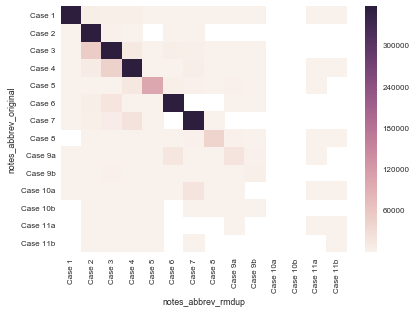

In [30]:
sns.heatmap(cases_counts, vmax=356904)

In [31]:
cases_counts_no_case22 = cases_counts.copy()
cases_counts_no_case22.loc['Case 2', 'Case 2'] = np.nan
cases_counts_no_case22

notes_abbrev_rmdup,Case 1,Case 2,Case 3,Case 4,Case 5,Case 6,Case 7,Case 8,Case 9a,Case 9b,Case 10a,Case 10b,Case 11a,Case 11b
notes_abbrev_original,,,,,,,,,,,,,,
Case 1,439367.0,5294.0,3569.0,4055.0,1395.0,353.0,280.0,19.0,139.0,15.0,NaN,NaN,5.0,4.0
Case 2,1103.0,NaN,2328.0,46.0,NaN,8.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case 3,1371.0,51976.0,465299.0,11997.0,209.0,5068.0,2811.0,51.0,47.0,207.0,NaN,NaN,NaN,NaN
Case 4,776.0,9410.0,45014.0,801935.0,1040.0,188.0,4495.0,42.0,27.0,34.0,NaN,NaN,2.0,1.0
Case 5,210.0,774.0,1157.0,14255.0,102611.0,2830.0,1464.0,129.0,2000.0,482.0,NaN,NaN,4.0,NaN
Case 6,47.0,4928.0,17423.0,914.0,17.0,434767.0,NaN,NaN,74.0,12.0,NaN,NaN,NaN,NaN
Case 7,30.0,3442.0,6024.0,20234.0,608.0,NaN,678362.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Case 8,NaN,252.0,273.0,556.0,278.0,90.0,2709.0,42089.0,2089.0,141.0,NaN,NaN,4.0,2.0
Case 9a,23.0,412.0,632.0,310.0,433.0,16023.0,5.0,236.0,19112.0,2254.0,NaN,NaN,1.0,NaN


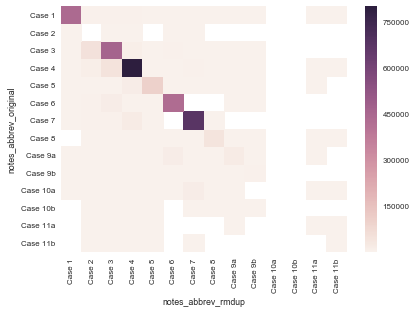

In [32]:
sns.heatmap(cases_counts_no_case22)

In [33]:
cases_counts_no_case22_percent_original = 100 * cases_counts_no_case22/cases_counts_no_case22.sum(axis=1)
cases_counts_no_case22_percent_original

notes_abbrev_rmdup,Case 1,Case 2,Case 3,Case 4,Case 5,Case 6,Case 7,Case 8,Case 9a,Case 9b,Case 10a,Case 10b,Case 11a,Case 11b
notes_abbrev_original,,,,,,,,,,,,,,
Case 1,96.671471,150.697410,0.662108,0.469892,1.107881,0.077044,0.039509,0.039189,0.352425,0.210438,NaN,NaN,7.352941,13.333333
Case 2,0.242687,NaN,0.431882,0.005330,NaN,0.001746,0.003951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case 3,0.301653,1479.533163,86.320580,1.390209,0.165984,1.106111,0.396641,0.105192,0.119165,2.904040,NaN,NaN,NaN,NaN
Case 4,0.170739,267.862226,8.350834,92.927978,0.825947,0.041032,0.634259,0.086628,0.068457,0.476992,NaN,NaN,2.941176,3.333333
Case 5,0.046205,22.032451,0.214642,1.651865,81.491629,0.617658,0.206575,0.266073,5.070865,6.762065,NaN,NaN,5.882353,NaN
Case 6,0.010341,140.278964,3.232252,0.105914,0.013501,94.889585,NaN,NaN,0.187622,0.168350,NaN,NaN,NaN,NaN
Case 7,0.006601,97.978935,1.117551,2.344710,0.482862,NaN,95.719069,0.002063,NaN,NaN,NaN,NaN,NaN,NaN
Case 8,NaN,7.173356,0.050646,0.064429,0.220782,0.019643,0.382249,86.811872,5.296519,1.978114,NaN,NaN,5.882353,6.666667
Case 9a,0.005061,11.727868,0.117246,0.035923,0.343880,3.497082,0.000706,0.486769,48.457189,31.621773,NaN,NaN,1.470588,NaN


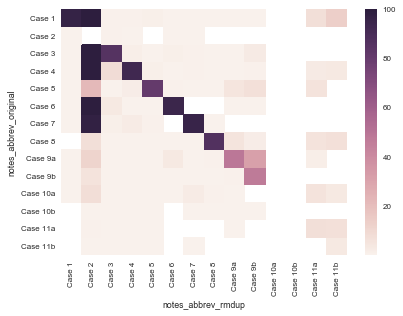

In [34]:
sns.heatmap(cases_counts_no_case22_percent_original, vmax=100)

In [35]:
cases_counts_no_case22_percent_rmdup = 100 * cases_counts_no_case22/cases_counts_no_case22.sum()
cases_counts_no_case22_percent_rmdup

notes_abbrev_rmdup,Case 1,Case 2,Case 3,Case 4,Case 5,Case 6,Case 7,Case 8,Case 9a,Case 9b,Case 10a,Case 10b,Case 11a,Case 11b
notes_abbrev_original,,,,,,,,,,,,,,
Case 1,99.191553,6.874878,0.655958,0.473871,1.306828,0.076650,0.039524,0.044227,0.585682,0.229428,NaN,NaN,20.0,36.363636
Case 2,0.249013,NaN,0.427870,0.005376,NaN,0.001737,0.003952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Case 3,0.309517,67.496916,85.518756,1.401981,0.195790,1.100454,0.396797,0.118715,0.198036,3.166106,NaN,NaN,NaN,NaN
Case 4,0.175190,12.219986,8.273264,93.714869,0.974266,0.040822,0.634509,0.097765,0.113766,0.520037,NaN,NaN,8.0,9.090909
Case 5,0.047410,1.005130,0.212649,1.665853,96.125418,0.614500,0.206656,0.300279,8.427085,7.372285,NaN,NaN,16.0,NaN
Case 6,0.010611,6.399584,3.202228,0.106811,0.015926,94.404358,NaN,NaN,0.311802,0.183542,NaN,NaN,NaN,NaN
Case 7,0.006773,4.469840,1.107170,2.364564,0.569571,NaN,95.756766,0.002328,NaN,NaN,NaN,NaN,NaN,NaN
Case 8,NaN,0.327251,0.050176,0.064975,0.260429,0.019542,0.382399,97.972533,8.802090,2.156623,NaN,NaN,16.0,18.181818
Case 9a,0.005192,0.535030,0.116157,0.036227,0.405632,3.479199,0.000706,0.549348,80.529221,34.475375,NaN,NaN,4.0,NaN


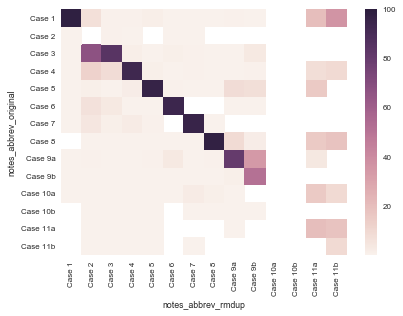

In [36]:
sns.heatmap(cases_counts_no_case22_percent_rmdup, vmax=100)

## Make scatterplots

In [37]:
summary.shape

(12567319, 28)

In [38]:
summary_not_both_na = summary.loc[summary['psi_original'].notnull() | summary['psi_rmdup'].notnull()]
print(summary_not_both_na.shape)
summary_not_both_na.head()

(1353054, 28)


,sample_id,event_id,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,...,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_copy,note_copy,notes_abbrev_rmdup,dataset_rmdup,comparison_categories
33,CVN_35,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,7.0,NaN,15.0,13.0,NaN,Case 10a: Isoform1 has 1+ junction with insuff...,...,7.0,NaN,Case 3: All junctions with insufficient reads,NaN,CVN_35_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 3: All junctions with insufficient reads,Case 3: All junctions with insufficient reads,Case 3,rmdup,"rmdup NA, original Psi"
94,M3_03,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,8.0,NaN,0.0,0.0,NaN,Case 3: All junctions with insufficient reads,...,0.0,NaN,Case 6: Exclusion,0.0,M3_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 6: Exclusion,Case 6: Exclusion,Case 6,rmdup,"rmdup Psi, original NA"
132,MSA_24,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,65.0,52.0,NaN,Case 7: Inclusion,...,47.0,NaN,Case 7: Inclusion,1.0,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 7: Inclusion,Case 7: Inclusion,Case 7,rmdup,Within $|\Delta\Psi| \leq 0.2$
192,P1_06,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,12.0,11.0,NaN,Case 7: Inclusion,...,9.0,NaN,Case 4: Only one junction with sufficient reads,NaN,P1_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 4: Only one junction with sufficient reads,Case 4: Only one junction with sufficient reads,Case 4,rmdup,"rmdup NA, original Psi"
196,P1_10,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,43.0,NaN,0.0,0.0,NaN,Case 6: Exclusion,...,0.0,NaN,Case 6: Exclusion,0.0,P1_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 6: Exclusion,Case 6: Exclusion,Case 6,rmdup,Within $|\Delta\Psi| \leq 0.2$


In [39]:
summary_fillna = summary_not_both_na.fillna({'psi_original': -0.1, 'psi_rmdup': -0.1})
summary_fillna.head()

,sample_id,event_id,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,...,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_copy,note_copy,notes_abbrev_rmdup,dataset_rmdup,comparison_categories
33,CVN_35,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,7.0,NaN,15.0,13.0,NaN,Case 10a: Isoform1 has 1+ junction with insuff...,...,7.0,NaN,Case 3: All junctions with insufficient reads,-0.1,CVN_35_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 3: All junctions with insufficient reads,Case 3: All junctions with insufficient reads,Case 3,rmdup,"rmdup NA, original Psi"
94,M3_03,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,8.0,NaN,0.0,0.0,NaN,Case 3: All junctions with insufficient reads,...,0.0,NaN,Case 6: Exclusion,0.0,M3_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 6: Exclusion,Case 6: Exclusion,Case 6,rmdup,"rmdup Psi, original NA"
132,MSA_24,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,65.0,52.0,NaN,Case 7: Inclusion,...,47.0,NaN,Case 7: Inclusion,1.0,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 7: Inclusion,Case 7: Inclusion,Case 7,rmdup,Within $|\Delta\Psi| \leq 0.2$
192,P1_06,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,12.0,11.0,NaN,Case 7: Inclusion,...,9.0,NaN,Case 4: Only one junction with sufficient reads,-0.1,P1_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 4: Only one junction with sufficient reads,Case 4: Only one junction with sufficient reads,Case 4,rmdup,"rmdup NA, original Psi"
196,P1_10,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,43.0,NaN,0.0,0.0,NaN,Case 6: Exclusion,...,0.0,NaN,Case 6: Exclusion,0.0,P1_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 6: Exclusion,Case 6: Exclusion,Case 6,rmdup,Within $|\Delta\Psi| \leq 0.2$


In [40]:
# sns.FacetGrid?

In [41]:
vlim = -0.2, 1.05


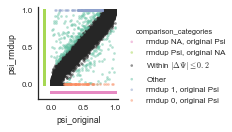

In [42]:
g = sns.FacetGrid(summary_fillna,
                  hue=col, palette=palette, 
#                   subplot_kws=dict(#ncols=2, nrows=7, wspace=0.01),
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
#                   palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=2, aspect=1.1)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=5)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xlim=vlim, ylim=vlim)
g.add_legend()
# g.fig.tight_layout(w_pad=0.1)
g.savefig('{}/outrigger_vs_rmdup_psi.pdf'.format(figure_folder), dpi=300)


In [58]:
figure_folder

'figures/021_outrigger_vs_rmdup_percentages'

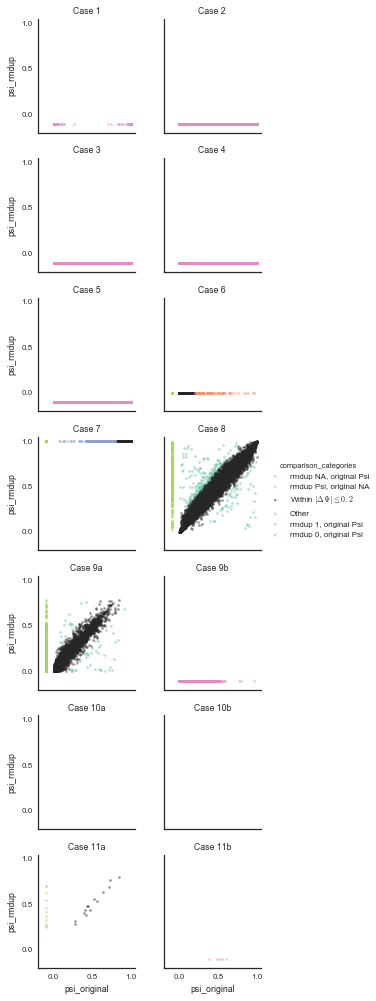

In [43]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', 
                  col_wrap=2,
                  hue=col, palette=palette, 
#                   subplot_kws=dict(#ncols=2, nrows=7, wspace=0.01),
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
#                   palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=2)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=5)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xlim=vlim, ylim=vlim)
g.add_legend()
# g.fig.tight_layout(w_pad=0.1)
g.savefig('{}/outrigger_vs_rmdup_psi_faceted_by_rmdup_case_hue_na.pdf'.format(figure_folder), dpi=300)


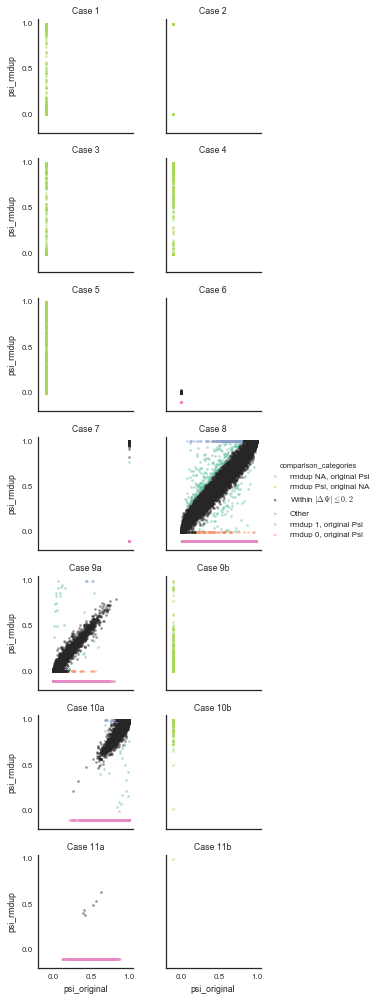

In [44]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_original', 
                  col_wrap=2,
                  hue=col, palette=palette, 
#                   subplot_kws=dict(#ncols=2, nrows=7, wspace=0.01),
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
#                   palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=2)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=5)
g.set_titles('{col_name}')

g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], ylim=vlim, xlim=vlim)
g.add_legend()
# g.fig.tight_layout(w_pad=0.1)
g.savefig('{}/outrigger_vs_rmdup_psi_faceted_by_original_case_hue_na.pdf'.format(figure_folder), dpi=300)


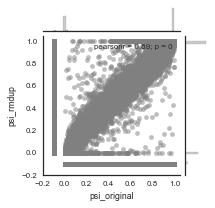

In [45]:
g = sns.jointplot('psi_original', 'psi_rmdup', summary_fillna, color='grey', 
                  joint_kws=dict(rasterized=True), size=3, alpha=0.5)
g.ax_joint.set(xlim=vlim, ylim=vlim)
g.savefig('{}/outrigger_vs_rmdup_psi_jointplot.pdf'.format(figure_folder), dpi=300)

## Number of events per cell

In [46]:
events_per_sample = summary_not_both_na.groupby(['sample_id'], group_keys=True).apply(lambda df: df[['psi_rmdup', 'psi_original']].notnull().sum())
print(events_per_sample.shape)
events_per_sample.head()

(243, 2)


,psi_rmdup,psi_original
sample_id,,
CVN_01,5280,5831
CVN_02,4093,4562
CVN_03,3444,3768
CVN_04,5193,5898
CVN_05,5573,6375


In [47]:
events_per_sample_tidy = events_per_sample.unstack().reset_index()
events_per_sample_tidy = events_per_sample_tidy.rename(columns={'level_0': 'dataset', 0: 'Number of events'})
events_per_sample_tidy.head()

,dataset,sample_id,Number of events
0,psi_rmdup,CVN_01,5280
1,psi_rmdup,CVN_02,4093
2,psi_rmdup,CVN_03,3444
3,psi_rmdup,CVN_04,5193
4,psi_rmdup,CVN_05,5573


In [48]:
events_per_sample_metadata = events_per_sample_tidy.join(study.metadata.data, on='sample_id')
print(events_per_sample_metadata.shape)
events_per_sample_metadata.head()

(486, 13)


,dataset,sample_id,Number of events,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier
0,psi_rmdup,CVN_01,5280,True,False,NPC,False,True,False,True,NaN,NaN,False
1,psi_rmdup,CVN_02,4093,True,False,NPC,False,True,False,True,NaN,NaN,False
2,psi_rmdup,CVN_03,3444,True,False,NPC,False,True,False,True,NaN,NaN,False
3,psi_rmdup,CVN_04,5193,True,False,NPC,False,True,False,True,NaN,NaN,False
4,psi_rmdup,CVN_05,5573,True,False,NPC,False,True,False,True,NaN,NaN,False


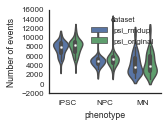

In [49]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.violinplot(x='phenotype', y='Number of events', hue='dataset', data=events_per_sample_metadata, cut=True, 
               order=study.phenotype_order)
sns.despine()
fig.savefig('{}/number_of_events_per_sample_violinplots.pdf'.format(figure_folder))

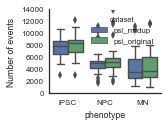

In [50]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.boxplot(x='phenotype', y='Number of events', hue='dataset', data=events_per_sample_metadata, order=study.phenotype_order)
sns.despine()
fig.savefig('{}/number_of_events_per_sample_boxplots.pdf'.format(figure_folder))

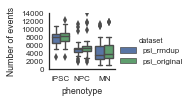

In [51]:
# fig, ax = plt.subplots(figsize=(2, 1.5))

sns.factorplot(x='phenotype', y='Number of events', hue='dataset', 
               data=events_per_sample_metadata, order=study.phenotype_order, 
               kind='box', size=1.5, aspect=1.33)
sns.despine()
fig.savefig('{}/number_of_events_per_sample_boxplots_faceted.pdf'.format(figure_folder))

In [52]:
# summary_fillna['either_na'] = "0 <= Psi <= 1"
# summary_fillna.loc[summary['psi_rmdup'].isnull(), 'either_na'] = 'rmdup NA'
# summary_fillna.loc[summary['psi_original'].isnull(), 'either_na'] = 'original NA'
# summary_fillna.head()

In [53]:
summary_fillna.shape

(1353054, 28)

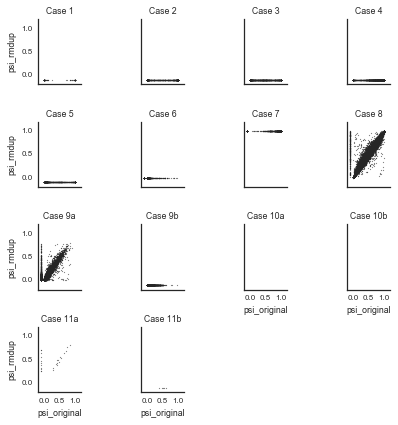

In [54]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', col_wrap=4, 
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA']
#                   palette=['#262626', ''],
                  col_order=case_order, size=1.5)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, color='#262626', rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/psi_original_vs_rmdup_faceted_by_rmdup_case.pdf'.format(figure_folder), dpi=300)

## Add color for which is NA

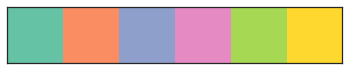

In [55]:
set2 = sns.color_palette('Set2')
sns.palplot(set2)
original_na_color = set2[1]
rmdup_na_color = set2[2]

In [56]:
gridspec_kws = dict(wspace=0.01, hspace=0.05)

In [57]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', col_wrap=4, hue='either_na', 
                  hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
                  palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=1.5, gridspec_kws=gridspec_kws)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
# g.savefig('{}/outrigger_vs_miso_psi_faceted_by_rmdup_case_hue_na.pdf'.format(figure_folder), dpi=300)

KeyError: 'either_na'

In [ ]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_original', col_wrap=4, hue='either_na', 
                  hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
                  palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=1.5, gridspec_kws=gridspec_kws)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
# g.savefig('{}/outrigger_vs_miso_psi_faceted_by_original_case_hue_na.pdf'.format(figure_folder), dpi=300)

In [ ]:
from flotilla.visualize.splicing import lavalamp

In [ ]:
rmdup_psi.shape

In [ ]:
def extract_alternative_constitutive(psi):
    """Separate percent spliced-in matrix to exons that are actually alterantive vs constitutive
    
    Parameters
    ----------
    psi : pandas.DataFrame
        This is a (samples, features) shaped dataframe
    
    Returns
    -------
    alternative, constitutively0, constitutively1 : pandas.DataFrame
        Slices of the input dataframe that are alternative or constitutive
    """

    notnull = psi.notnull()

    constitutively0 = (psi == 0)[notnull].all()
    constitutively1 = (psi == 1)[notnull].all()
    print(constitutively1.sum())
    alternative = psi.columns[~constitutively0 & ~constitutively1]

    constitutively0 = constitutively0[constitutively0].index
    constitutively1 = constitutively1[constitutively1].index

    return psi[alternative], psi[constitutively0], psi[constitutively1]


rmdup_alternative, rmdup_constitutively0, rmdup_constitutively1 = extract_alternative_constitutive(rmdup_psi.T)
print(rmdup_alternative.shape)
print(rmdup_constitutively0.shape)
print(rmdup_constitutively1.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
lavalamp(rmdup_alternative, ax=ax, markersize=1, color='#262626')
# fig.savefig('{}/lavalamp_rmdup.pdf'.format(figure_folder), dpi=300)

In [ ]:
original_alternative, original_constitutively0, original_constitutively1 = extract_alternative_constitutive(original_psi.T)
print(original_alternative.shape)
print(original_constitutively0.shape)
print(original_constitutively1.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
lavalamp(original_alternative, ax=ax, markersize=1, color='#262626')
# fig.savefig('{}/lavalamp_original.pdf'.format(figure_folder), dpi=300)

## Look at PKM

In [ ]:
pkm_mxe_event = u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-'\
'|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'
pkm_mxe_event